In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import scipy.io.wavfile
import scipy.fftpack
from scipy import signal
from matplotlib.pyplot import figure


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Aug 27 07:30:43 2018', '__version__': '1.0', '__globals__': [], 'fs': array([[1000]], dtype=uint16), 'x': array([[-1.58049241],
       [ 1.59550055],
       [ 0.50427618],
       ...,
       [-0.68244062],
       [ 3.04750367],
       [ 0.41779802]]), 'y': array([[-0.00192855],
       [ 0.10606601],
       [ 0.21211503],
       ...,
       [-0.14120624],
       [-0.07099272],
       [ 0.00050981]])}
dict_keys(['__header__', '__version__', '__globals__', 'fs', 'x', 'y'])
1000
(10000, 1)
(10000, 1)


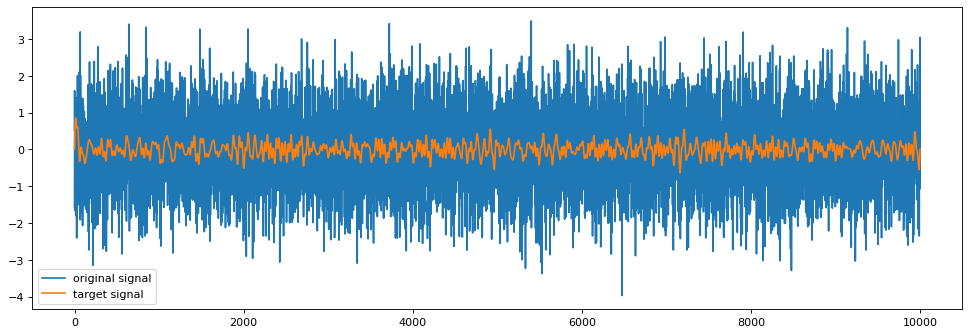

In [68]:
from matplotlib.pyplot import figure
figure(figsize=(15, 5), dpi=80)

# import data
data = sio.loadmat('./filtering_codeChallenge.mat')
print(data)
print(data.keys())

originalSignal = data["x"]
targetSignal = data["y"]
fs = data["fs"][0][0]
n = len(originalSignal)

print(fs)
print(originalSignal.shape)
print(targetSignal.shape)

plt.plot(originalSignal, label='original signal')
plt.plot(targetSignal, label='target signal')
plt.legend()
plt.show()

[0.00000000e+00 1.00010001e-01 2.00020002e-01 ... 9.99799980e+02
 9.99899990e+02 1.00000000e+03]


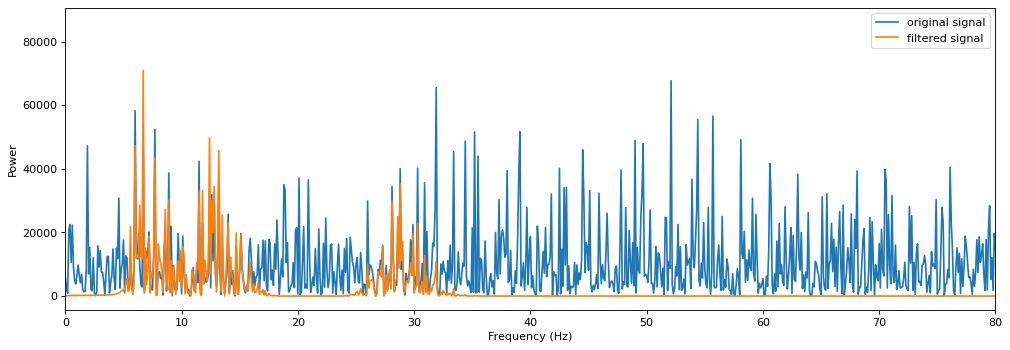

In [69]:
figure(figsize=(15, 5), dpi=80)

bcpow = np.abs(scipy.fftpack.fft(originalSignal, axis=0))**2
bcpowFiltered = np.abs(scipy.fftpack.fft(targetSignal,axis=0))**2
hz = np.linspace(0, fs, len(originalSignal))
print(hz)

plt.plot(hz,bcpow, label='original signal')
plt.plot(hz,bcpowFiltered, label='filtered signal')

plt.legend()
plt.xlim([0,80])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()

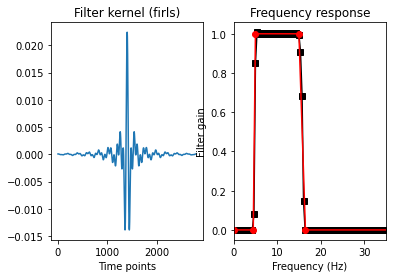

In [70]:
# define filter parameters
lower_bnd = 5 # Hz
upper_bnd = 15 # Hz

lower_trans = .1
upper_trans = .1

samprate  = fs # Hz
filtorder = 14*np.round(samprate/lower_bnd)+1

filter_shape = [ 0,0,1,1,0,0 ]
filter_freqs = [ 0, lower_bnd*(1-lower_trans), lower_bnd, upper_bnd, \
                upper_bnd+upper_bnd*upper_trans,  samprate/2 ]

filterkern1 = signal.firls(filtorder,filter_freqs,filter_shape,fs=samprate)
hz = np.linspace(0,samprate/2,int(np.floor(len(filterkern1)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filterkern1))**2


# let's see it
plt.subplot(121)
plt.plot(filterkern1)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')


# plot amplitude spectrum of the filter kernel
plt.subplot(122)
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.plot(filter_freqs,filter_shape,'ro-')

# make the plot look nicer
plt.xlim([0,upper_bnd+20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()

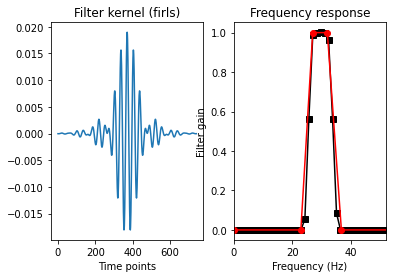

In [71]:
# define filter parameters
lower_bnd = 27 # Hz
upper_bnd = 32 # Hz

lower_trans = .15
upper_trans = .15

samprate  = fs # Hz
filtorder = 20*np.round(samprate/lower_bnd)+1

filter_shape = [ 0,0,1,1,0,0 ]
filter_freqs = [ 0, lower_bnd*(1-lower_trans), lower_bnd, upper_bnd, \
                upper_bnd+upper_bnd*upper_trans,  samprate/2 ]

filterkern2 = signal.firls(filtorder,filter_freqs,filter_shape,fs=samprate)
hz = np.linspace(0,samprate/2,int(np.floor(len(filterkern2)/2)+1))
filterpow = np.abs(scipy.fftpack.fft(filterkern2))**2


# let's see it
plt.subplot(121)
plt.plot(filterkern2)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')


# plot amplitude spectrum of the filter kernel
plt.subplot(122)
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.plot(filter_freqs,filter_shape,'ro-')

# make the plot look nicer
plt.xlim([0,upper_bnd+20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()

In [72]:
filteredSignal1 = signal.filtfilt(filterkern1,1,originalSignal.flatten())
filteredSignal2 = signal.filtfilt(filterkern2,1,originalSignal.flatten())
filteredSignal =  filteredSignal1 + filteredSignal2
timevec = np.arange(0,len(filteredSignal2))/samprate


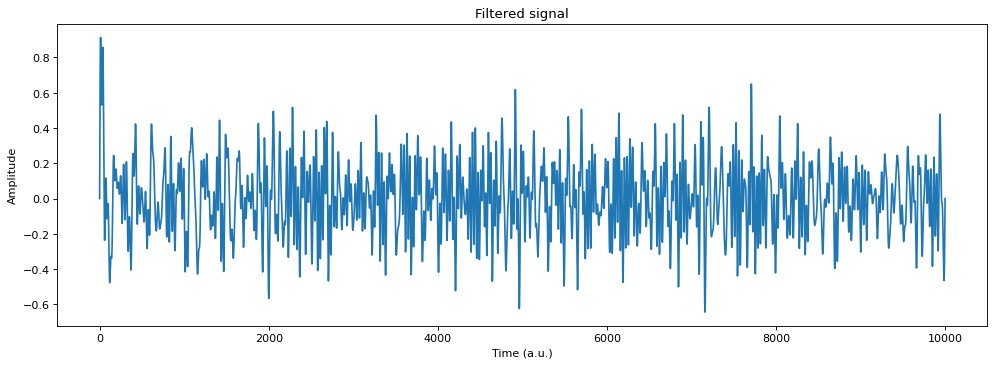

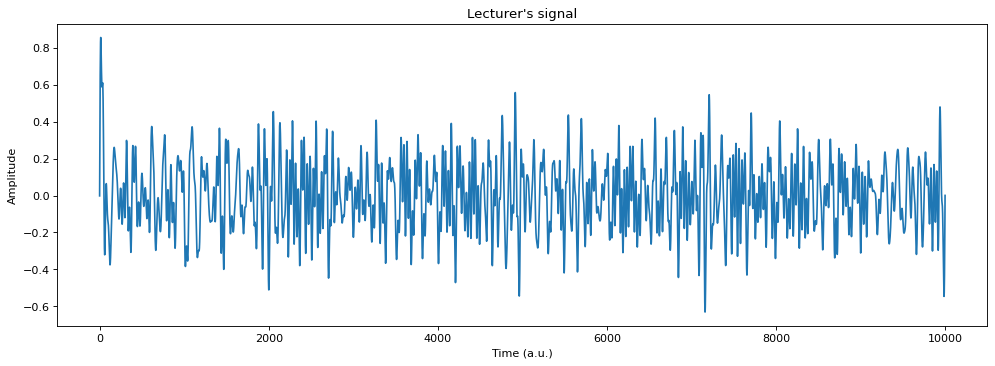

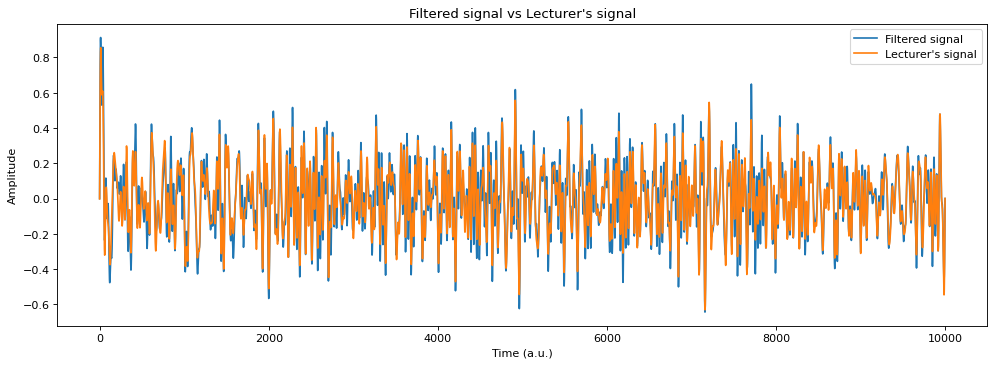

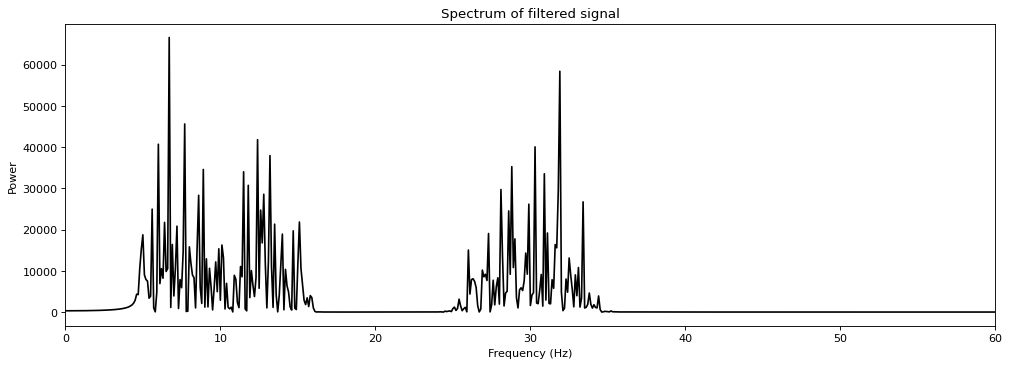

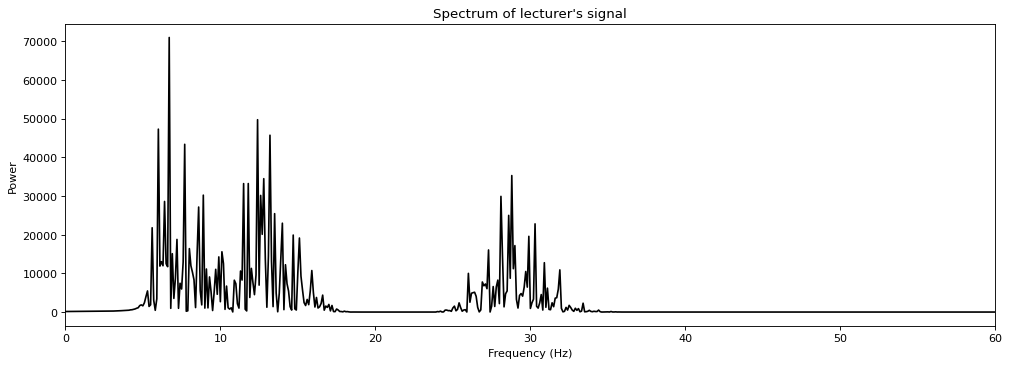

In [73]:
# plot time series
figure(figsize=(15, 5), dpi=80)
plt.plot(filteredSignal)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Filtered signal')

figure(figsize=(15, 5), dpi=80)
plt.plot(targetSignal)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Lecturer\'s signal')

figure(figsize=(15, 5), dpi=80)
plt.plot(filteredSignal, label="Filtered signal")
plt.plot(targetSignal, label="Lecturer\'s signal")
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Filtered signal vs Lecturer\'s signal')
plt.legend()
plt.show()

# plot power spectrum
figure(figsize=(15, 5), dpi=80)
power = np.abs(scipy.fftpack.fft(filteredSignal))**2
plt.plot(np.linspace(0,samprate,len(power)),power,'k')
plt.xlim([0,60])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Spectrum of filtered signal')
plt.show()

figure(figsize=(15, 5), dpi=80)
power = np.abs(scipy.fftpack.fft(targetSignal, axis=0))**2
plt.plot(np.linspace(0,samprate,len(power)),power,'k')
plt.xlim([0,60])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Spectrum of lecturer\'s signal')
plt.show()
